In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [323]:
data = pd.read_csv('./processed.cleveland.csv')

In [324]:
data = pd.DataFrame(data)

In [325]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,flat,3.0,normal,2
2,67,1,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0.0,normal,0


### Data Dictionary

**Column Position** | **Attribute Name** |  **Description**                                                                                     | **Attribute Type**    
--------------------| -------------------|  ----------------------------------------------------------------------------------------------------|------------------
     #1             |   age              |  age of the patient                                                                                  | numberical
     #2             |   sex              |  gender of the patient                                                                               | categorical
     #3             |   cp               |  type of chest pain ('Typical Angina','atypical angina','non-anginal pain','asymptomatic')           | categorical           
     #4             |   trestbps         |  resting blood pressure (in mm Hg on admission to the hospital)                                      | numberical    
     #5             |   chol             |  serum  cholesterol in mg/dl                                                                         | numberical     
     #6             |   fbs              |  (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)                                             | categorical
     #7             |   restecg          |  resting ECG results ('normal', 'left ventricular hypertrophy', 'ST-T wave abnormality')             | categorical
     #8             |   thalach          |  maximum heart rate achieved                                                                         | numberical
     #9             |   exang            |  exercise induced angina (1 = yes; 0 = no)                                                           | categorical
     #10            |   oldpeak          |  ST depression induced by exercise relative to rest                                                  | numberical
     #11            |   slope            |  the slope of the peak exercise ST segment ('upsloping','flat','down sloping)                        | categorical
     #12            |   ca               |  number of major vessels (0-3) colored by fluoroscopy                                                | categorical   
     #13            |   thal             |  thalassemia ('normal','fixed defect','reversible defect')                                           | categorical    
     #14            |   num              |  angiographic disease status (0: no heart disease, > 0: heart disease)                               | categorical


In [326]:
data.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,149.607261,0.326733,1.039604,0.672241,0.937294
std,9.038662,0.467299,17.599748,51.776918,0.356198,22.875003,0.469794,1.161075,0.937438,1.228536
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,1.000000,2.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        299 non-null    float64
 12  thal      301 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 33.3+ KB


CONVERT CATEGORICAL

In [328]:
for i in ['sex','cp','fbs','restecg','exang','slope','ca','thal']:
    data[i] = data[i].astype('category')

In [329]:
# Count missing value
for i in data.columns:
    print(i + " - "+ str(data[i].isnull().sum()))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 4
thal - 2
num - 0


In [330]:
data.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64

In [331]:
# Replace missing value with most frequent value
data['ca'] = data['ca'].fillna(data['ca'].mode().iloc[0])
data['thal'] = data['thal'].fillna(data['thal'].mode().iloc[0])

In [332]:
for i in data.columns:
    print(i + " - "+ str(data[i].isnull().sum()))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
num - 0


In [333]:
data = data.drop_duplicates()

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  num       303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 20.1 KB


In [335]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,flat,3.0,normal,2
2,67,1,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0.0,normal,0


In [336]:
data['cp'] = data['cp'].map({'typical angina':1, 'atypical angina':2, 'non-anginal pain':3, 'asymptomatic':4}).astype(int)
data['restecg'] = data['restecg'].map({'normal':0, 'ST-T wave abnormality':1, 'left ventricular hypertrophy':2}).astype(int)
data['slope'] = data['slope'].map({'upsloping':1, 'flat':2, 'downsloping':3}).astype(int)
data['thal'] = data['thal'].map({'normal':3, 'fixed defect':6, 'reversable defect':7}).astype(int)
for i in data['num']:
    if i > 0:
        data['num'] = data['num'].replace(i, 1)

In [337]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3,0


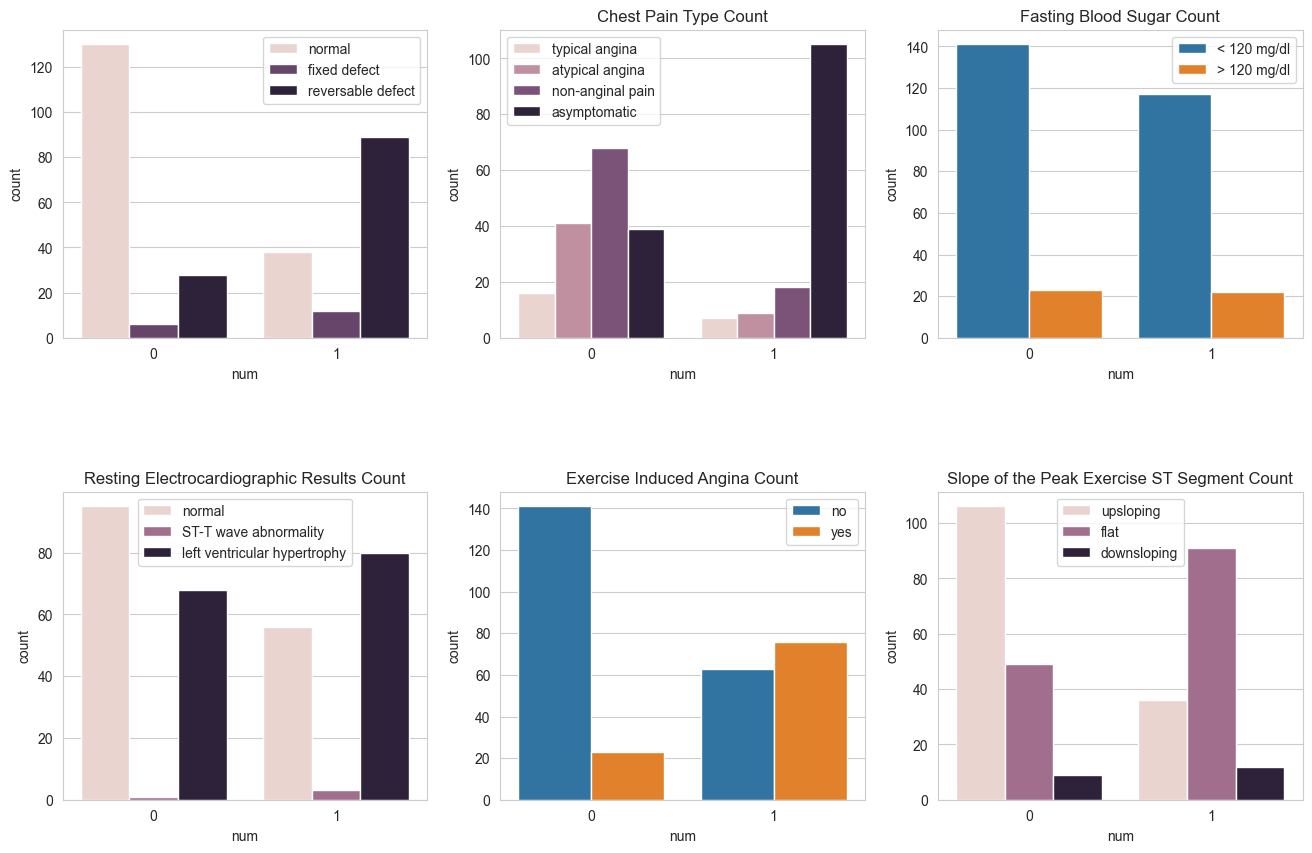

In [338]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
    
plt.subplots_adjust(wspace=0.2, hspace=0.5)

sns.countplot(x='num', hue='cp', data=data, ax=ax[0, 1])
cp_legend = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
ax[0, 1].legend(cp_legend)
ax[0, 1].set_title('Chest Pain Type Count')

sns.countplot(x='num', hue='fbs', data=data, ax=ax[0, 2])
fbs_legend = ['< 120 mg/dl', '> 120 mg/dl']
ax[0, 2].legend(fbs_legend)
ax[0, 2].set_title('Fasting Blood Sugar Count')

sns.countplot(x='num', hue='restecg', data=data, ax=ax[1, 0])
restecg_legend = ['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy']
ax[1, 0].legend(restecg_legend)
ax[1, 0].set_title('Resting Electrocardiographic Results Count')

sns.countplot(x='num', hue='exang', data=data, ax=ax[1, 1])
exang_legend = ['no', 'yes']
ax[1, 1].legend(exang_legend)
ax[1, 1].set_title('Exercise Induced Angina Count')

sns.countplot(x='num', hue='slope', data=data, ax=ax[1, 2])
slope_legend = ['upsloping', 'flat', 'downsloping']
ax[1, 2].legend(slope_legend)
ax[1, 2].set_title('Slope of the Peak Exercise ST Segment Count')

sns.countplot(x='num', hue='thal', data=data, ax=ax[0,0])
thal_legend = ['normal', 'fixed defect', 'reversable defect']
ax[0, 0].legend(thal_legend)

plt.show()

Nhìn các đồ thị biểu diễn trên có thể cho ta thấy

Phần trăm người mắc bệnh đau tim chiếm phần lớn là ở nữ giới

Người mắc bệnh đau tim phần lớn có dấu hiệu sẽ không có triệu chứng cụ thể, ít dần hơn sẽ là đau nhẹ, đau thắt ngực không điển hình và cuối cùng là đau thắt ngực điển hình

Phần lớn người mắc bệnh đau tim sẽ có lượng đường huyết > 120 mg/dl

Phần lớn người mắc bệnh đau tim có kết quả điện tâm đồ là phì đại thất trái (left ventricular hypertrophy)

Phần lớn người mắc bệnh đau tim đau thắt ngực do tập thể dục

/var/folders/xw/yxc2mmkj3pzfp5cs3zv72nnc0000gn/T/ipykernel_71559/2263020756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num',data=data,palette='RdBu_r')


Text(0.5, 1.0, 'Heart Disease Frequency')

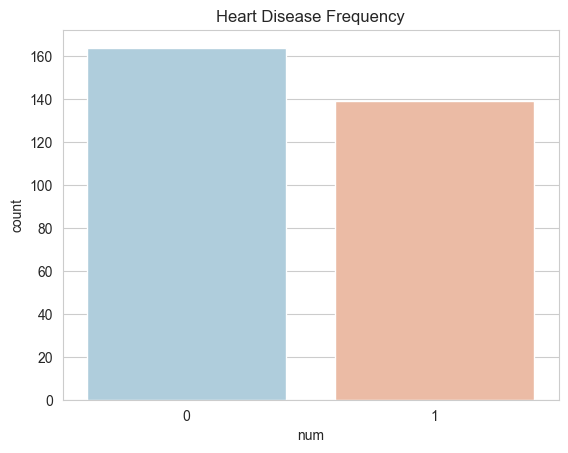

In [339]:
sns.set_style('whitegrid')
sns.countplot(x='num',data=data,palette='RdBu_r')
plt.title('Heart Disease Frequency')

Text(0.5, 1.0, 'Age Group Count')

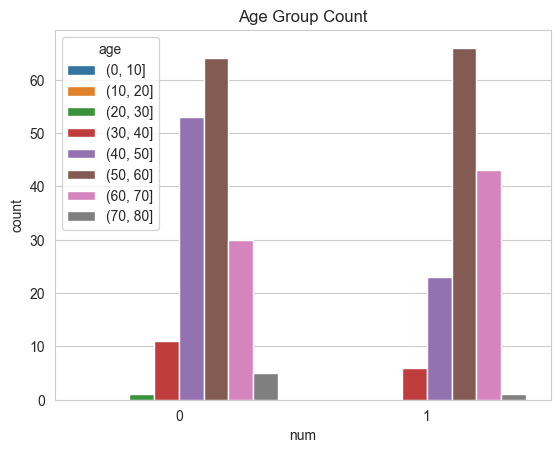

In [340]:
age_group = [0, 10, 20, 30, 40, 50, 60, 70, 80]

sns.countplot(x='num', hue=pd.cut(data['age'], age_group), data=data)
plt.title('Age Group Count')

Đồ thị histogram trên cho thấy người mắc bệnh tim chiếm phần lớn là người trong độ tuổi từ 51 tới 60.

Text(0, 0.5, 'Total')

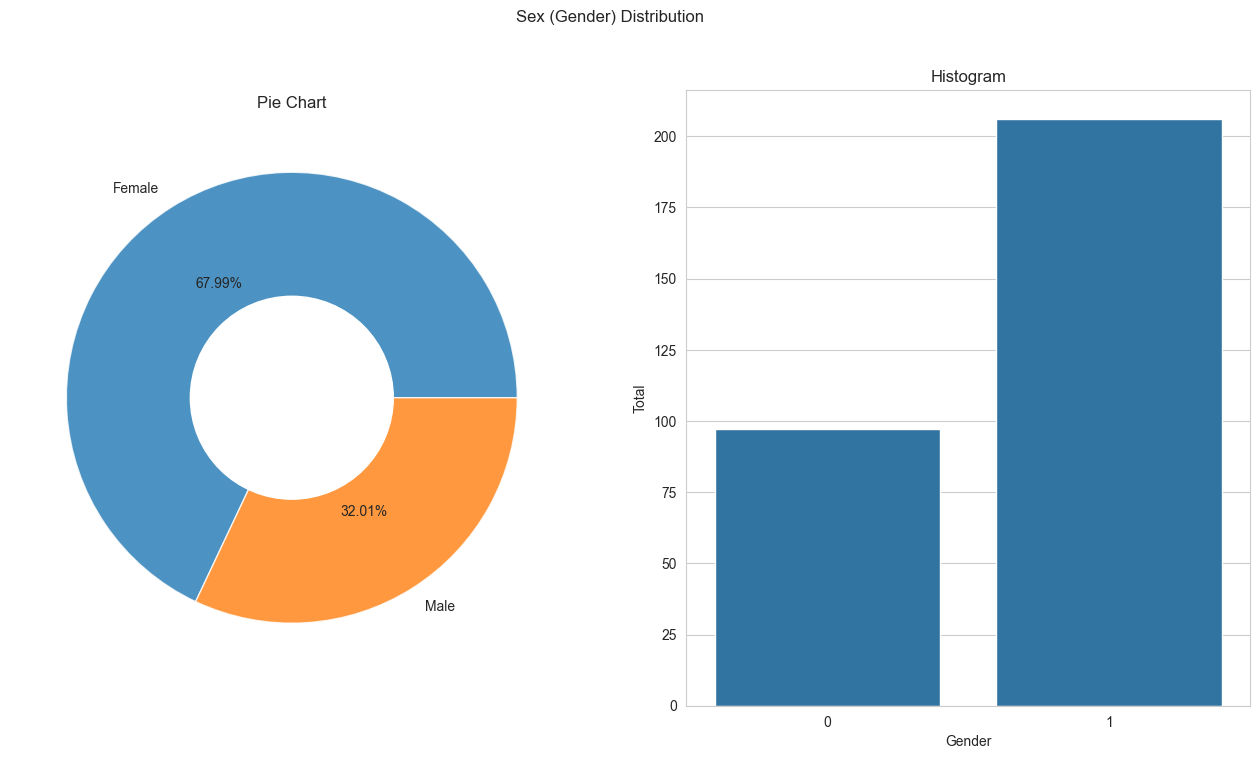

In [341]:
labels = ['Female', 'Male']
order = data['sex'].value_counts()

plt.figure(figsize= (16,8))
plt.suptitle('Sex (Gender) Distribution')

plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(data['sex'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(data, x="sex")
plt.xlabel('Gender')
plt.ylabel('Total')

/var/folders/xw/yxc2mmkj3pzfp5cs3zv72nnc0000gn/T/ipykernel_71559/3824871509.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Reds', linewidths=0.1)


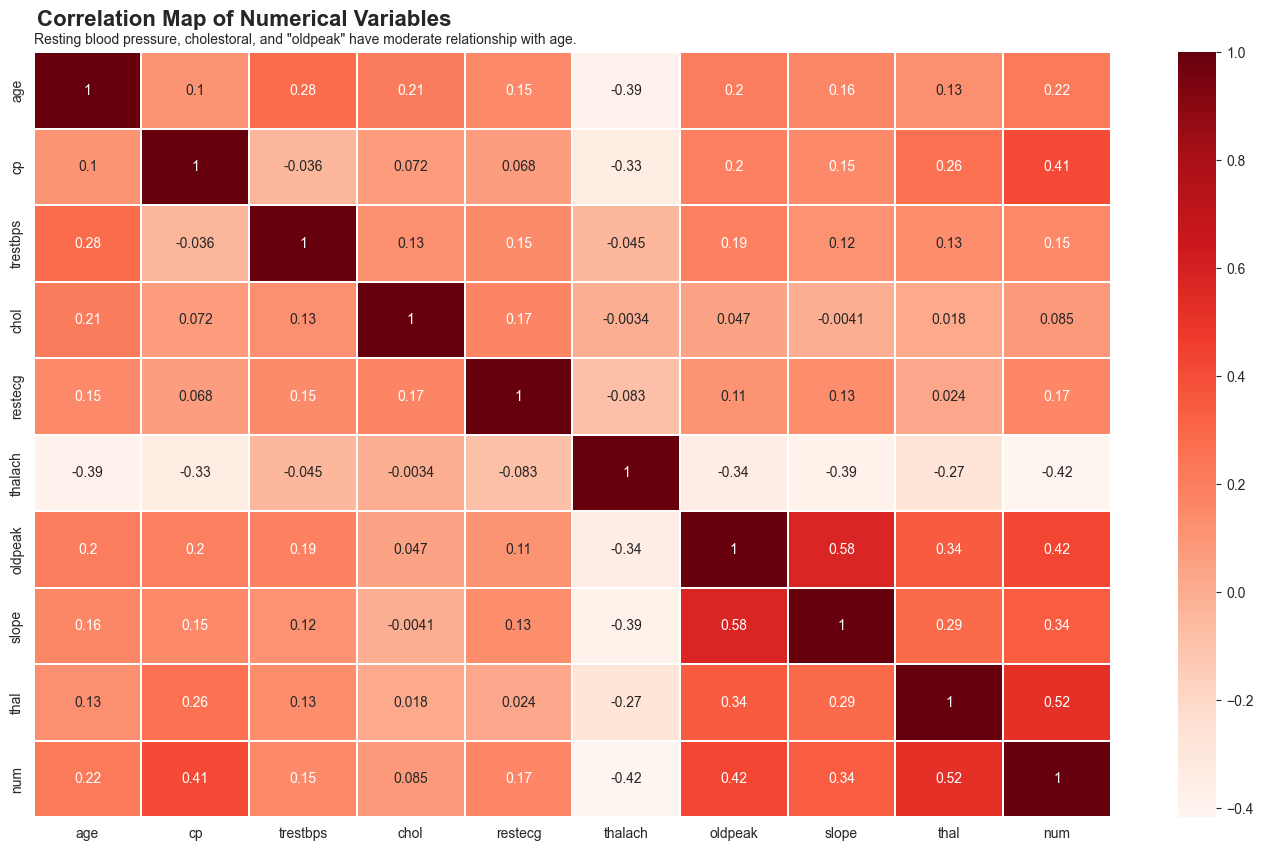

In [342]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(data.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

Data Processing

Sau khi vẽ và phân tích các feature ở trên thì chúng ta sẽ loại bỏ đi 2 feature không cần thiết cho bài toán là thal (thalassemia) và slope (the slope of the peak exercise ST segment)

In [343]:
thal = pd.get_dummies(data['thal'], prefix='thal')
slope = pd.get_dummies(data['slope'], prefix='slope')
data = pd.concat([data, thal, slope], axis=1)

In [344]:
data = data.drop(['thal', 'slope'], axis=1)

In [345]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,num,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,63,1,1,145,233,1,2,150,0,2.3,0.0,0,0,1,0,0,0,1
1,67,1,4,160,286,0,2,108,1,1.5,3.0,1,1,0,0,0,1,0
2,67,1,4,120,229,0,2,129,1,2.6,2.0,1,0,0,1,0,1,0
3,37,1,3,130,250,0,0,187,0,3.5,0.0,0,1,0,0,0,0,1
4,41,0,2,130,204,0,2,172,0,1.4,0.0,0,1,0,0,1,0,0


In [346]:
y = data["num"]
X = data.drop('num',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape

((242, 17), (242,), (61, 17))

LOGISTIC REGRESSION

In [347]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy: ', round(lr_acc * 100,2), '%')
print(classification_report(y_test,lr_pred))

Logistic Regression Accuracy:  77.05 %
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.77      0.65      0.71        26

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



NAIVE BAYES

In [348]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print('Naive Bayes Accuracy: ', round(nb_acc * 100,2), '%')
print(classification_report(y_test,nb_pred))

Naive Bayes Accuracy:  81.97 %
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        35
           1       0.86      0.69      0.77        26

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



RANDOM FOREST

In [349]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy: ', round(rf_acc * 100,2), '%')
print(classification_report(y_test,rf_pred))

Random Forest Accuracy:  73.77 %
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        35
           1       0.73      0.62      0.67        26

    accuracy                           0.74        61
   macro avg       0.74      0.72      0.73        61
weighted avg       0.74      0.74      0.73        61



K-NEIGHBORS

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

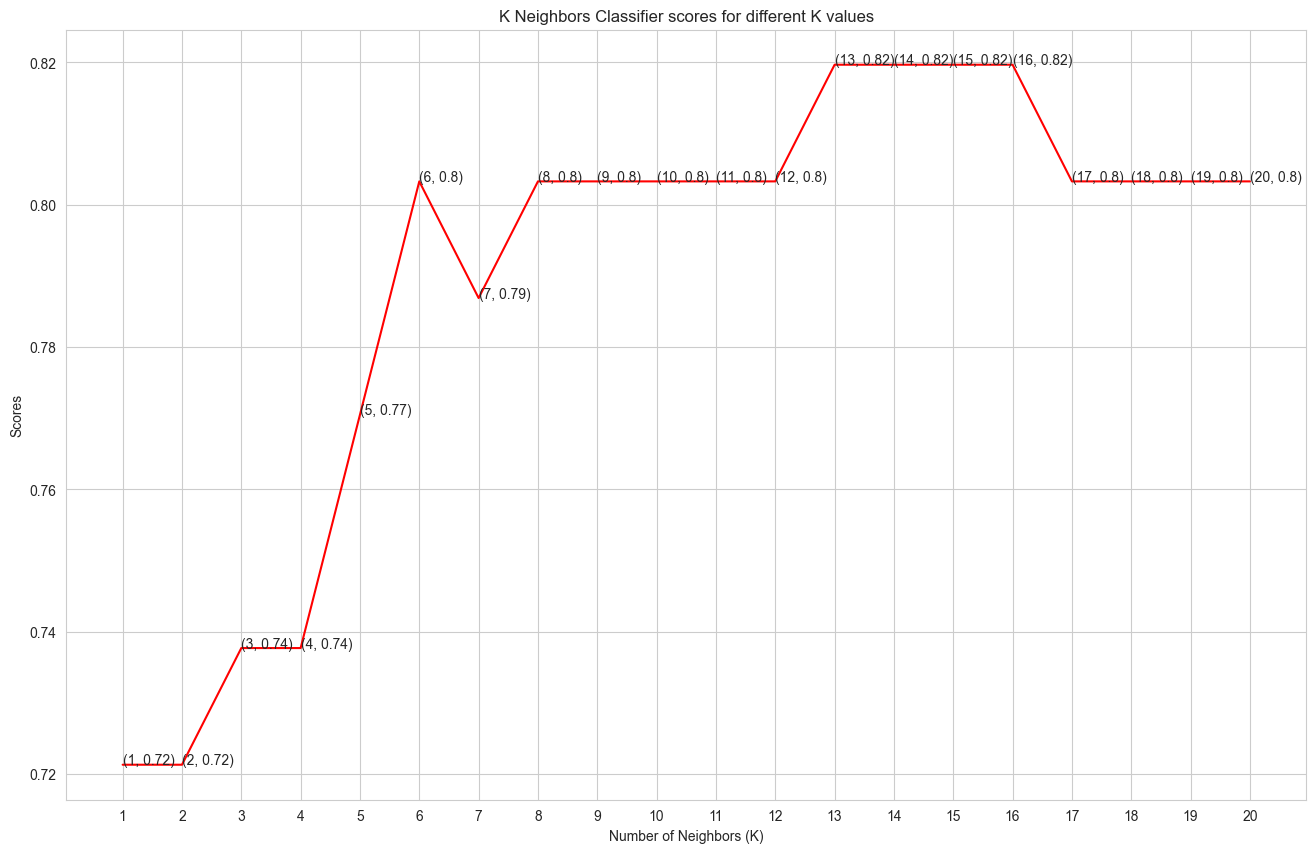

In [350]:
knn_scores = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_acc = accuracy_score(y_test, knn_pred)
    knn_scores.append(knn_acc)
plt.figure(figsize=(16,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1],2)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [351]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print('KNN Accuracy: ', round(knn_acc * 100,2), '%')
print(classification_report(y_test,knn_pred))

KNN Accuracy:  81.97 %
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        35
           1       0.89      0.65      0.76        26

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61



DECISION TREE

In [352]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print('Decision Tree Accuracy: ', round(dt_acc * 100,2), '%')
print(classification_report(y_test,dt_pred))

Decision Tree Accuracy:  72.13 %
              precision    recall  f1-score   support

           0       0.78      0.71      0.75        35
           1       0.66      0.73      0.69        26

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



SUPPORT VECTOR MACHINES

In [353]:
svm = SVC(kernel='rbf', C=2)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print('SVM Accuracy: ', round(svm_acc * 100,2), '%')
print(classification_report(y_test,svm_pred))

SVM Accuracy:  78.69 %
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.81      0.65      0.72        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



FEED FORWARD NEURAL NETWORK (FFNN)

In [354]:
ffnn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ffnn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
ffnn_pred = ffnn.predict(X_test)
ffnn_pred = np.round(ffnn_pred).astype(int)
ffnn_acc = accuracy_score(y_test, ffnn_pred)
print('FFNN Accuracy: ', round(ffnn_acc * 100,2), '%')
print(classification_report(y_test,ffnn_pred))

2/2 [==============================] - 0s 1ms/step
FFNN Accuracy:  78.69 %
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.78      0.69      0.73        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



RECCURRENT NEURAL NETWORK

LONG SHORT-TERM MEMORY (LSTM)

In [355]:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM model architecture
lstm = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

lstm_accuracy = lstm.evaluate(X_test_lstm, y_test, verbose=0)[1]
print("LSTM Accuracy:", round(lstm_accuracy * 100,2), '%')

Epoch 1/10
8/8 [==============================] - 1s 1ms/step - loss: 0.6822 - accuracy: 0.6736
Epoch 2/10
8/8 [==============================] - 0s 988us/step - loss: 0.6469 - accuracy: 0.8058
Epoch 3/10
8/8 [==============================] - 0s 928us/step - loss: 0.6163 - accuracy: 0.8140
Epoch 4/10
8/8 [==============================] - 0s 885us/step - loss: 0.5878 - accuracy: 0.8223
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.8223
Epoch 6/10
8/8 [==============================] - 0s 931us/step - loss: 0.5340 - accuracy: 0.8306
Epoch 7/10
8/8 [==============================] - 0s 958us/step - loss: 0.5093 - accuracy: 0.8306
Epoch 8/10
8/8 [==============================] - 0s 920us/step - loss: 0.4868 - accuracy: 0.8347
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.8388
Epoch 10/10
8/8 [==============================] - 0s 913us/step - loss: 0.4471 - accuracy: 0.8306
LSTM Accuracy: 77.05 %


GATED RECURRENT UNIT (GRU)

In [356]:
X_train_gru = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# GRU model architecture
gru = Sequential([
    GRU(units=64, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
    Dense(1, activation='sigmoid')
])
gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru.fit(X_train_gru, y_train, epochs=10, batch_size=32, verbose=1)

gru_accuracy = gru.evaluate(X_test_gru, y_test, verbose=0)[1]
print("GRU Accuracy:", round(gru_accuracy * 100,2), '%')

Epoch 1/10
8/8 [==============================] - 1s 1ms/step - loss: 0.6693 - accuracy: 0.6116
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.8182
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.8306
Epoch 4/10
8/8 [==============================] - 0s 942us/step - loss: 0.4905 - accuracy: 0.8264
Epoch 5/10
8/8 [==============================] - 0s 905us/step - loss: 0.4526 - accuracy: 0.8388
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.8471
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8636
Epoch 8/10
8/8 [==============================] - 0s 955us/step - loss: 0.3821 - accuracy: 0.8636
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8636
Epoch 10/10
8/8 [==============================] - 0s 952us/step - loss: 0.3570 - accuracy: 0.8678
GRU Accuracy: 80.33 %


MODEL EVALUATION

In [357]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'KNN', 'Decision Tree', 'SVM', 'FFNN', 'LSTM', 'GRU'],
                         'Accuracy': [lr_acc*100, nb_acc*100, rf_acc*100, knn_acc*100, dt_acc*100, svm_acc*100, ffnn_acc*100, lstm_accuracy*100, gru_accuracy*100]})
model_ev.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Naive Bayes,81.967213
3,KNN,81.967213
8,GRU,80.327868
5,SVM,78.688525
6,FFNN,78.688525
0,Logistic Regression,77.049180
7,LSTM,77.049178
2,Random Forest,73.770492
4,Decision Tree,72.131148


/var/folders/xw/yxc2mmkj3pzfp5cs3zv72nnc0000gn/T/ipykernel_71559/2294493057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=model_ev, palette='Blues_d')


<AxesSubplot: xlabel='Accuracy', ylabel='Model'>

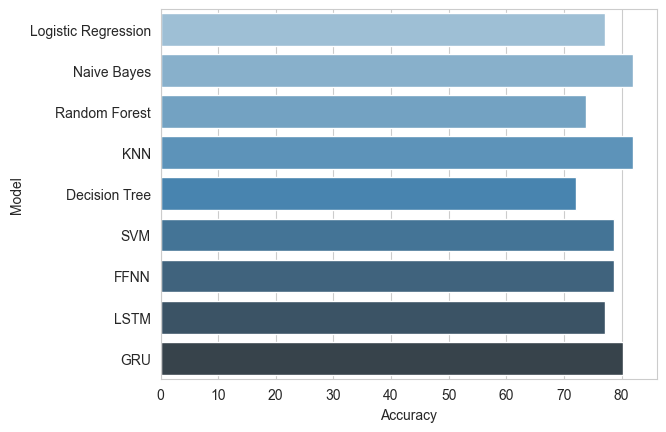

In [358]:
sns.barplot(x='Accuracy', y='Model', data=model_ev, palette='Blues_d')

OVERFITTING

In [359]:
model_L1 = LogisticRegression(penalty='l1', solver='liblinear')
model_L1.fit(X_train, y_train)
accuracy_L1 = model_L1.score(X_test, y_test)
print(f'Logistic Regression with L1 Regularization Accuracy: {accuracy_L1}')

# Khởi tạo mô hình Logistic Regression với Regularization L2 (Ridge)
model_L2 = LogisticRegression(penalty='l2', solver='liblinear')
model_L2.fit(X_train, y_train)
accuracy_L2 = model_L2.score(X_test, y_test)
print(f'Logistic Regression with L2 Regularization Accuracy: {accuracy_L2}')

Logistic Regression with L1 Regularization Accuracy: 0.7704918032786885
Logistic Regression with L2 Regularization Accuracy: 0.7704918032786885


In [360]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=64, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print("FFNN Test Accuracy:", accuracy)

Epoch 1/64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


7/7 [==============================] - 0s 12ms/step - loss: 0.7210 - accuracy: 0.5253 - val_loss: 0.6758 - val_accuracy: 0.6000
Epoch 2/64
7/7 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6590 - val_loss: 0.6047 - val_accuracy: 0.6800
Epoch 3/64
7/7 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.7419 - val_loss: 0.5462 - val_accuracy: 0.8000
Epoch 4/64
7/7 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.7834 - val_loss: 0.4992 - val_accuracy: 0.7600
Epoch 5/64
7/7 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7834 - val_loss: 0.4596 - val_accuracy: 0.8000
Epoch 6/64
7/7 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7834 - val_loss: 0.4302 - val_accuracy: 0.8400
Epoch 7/64
7/7 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.8018 - val_loss: 0.4015 - val_accuracy: 0.8400
Epoch 8/64
7/7 [============================

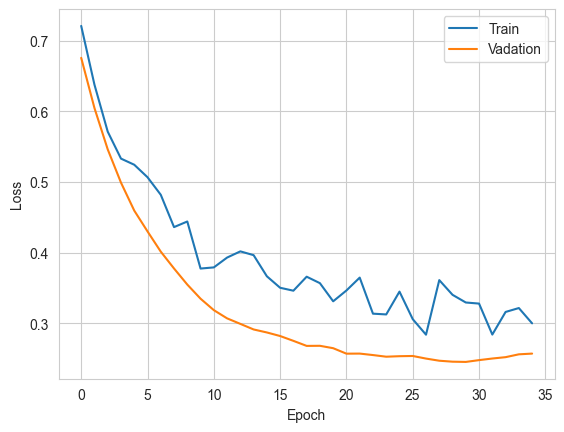

In [361]:
history.history
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Vadation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()